In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset into python environment

In [2]:
df = pd.read_csv('titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Make ‘PassengerId’ as the index column

In [4]:
df.set_index('PassengerId',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check the basic details of the dataset

In [5]:
df.shape

(891, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
#let's check for the amount of null values
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Fill in all the missing values present in all the columns in the dataset

In [9]:
# For Embarked column we can use its mode to fill in missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
# Since cabin has a lot of missing values let's see its mode
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [11]:
# It's better to discard this column because it has so many missing values
df.drop(columns='Cabin',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
#Let's fill th age column using it's median 
df['Age'] = df['Age'].fillna(df['Age'].median())


In [13]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Check and handle outliers in at least 3 columns in the dataset

In [14]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


#### Fare

<AxesSubplot:ylabel='Fare'>

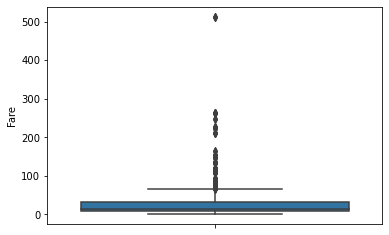

In [15]:
sns.boxplot(y = 'Fare',data = df)

In [16]:
q1  = np.percentile(df['Fare'],25,interpolation='midpoint')
q2  = np.percentile(df['Fare'],50,interpolation='midpoint')
q3  = np.percentile(df['Fare'],75,interpolation='midpoint')
q3

31.0

In [17]:
IQR = q3-q1
IQR

23.0896

In [18]:
up_limit = q3 + 1.5 *IQR
low_limit = q1 - 1.5 *IQR

In [19]:
outliers = df.loc[(df['Fare']>up_limit) | (df['Fare']<low_limit)].index
outliers

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [20]:
df.drop(outliers,inplace=True)

<AxesSubplot:ylabel='Fare'>

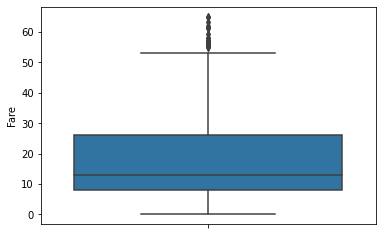

In [21]:
sns.boxplot(y = 'Fare',data = df)

We have removed the majority of the outliers

#### Age

<AxesSubplot:ylabel='Age'>

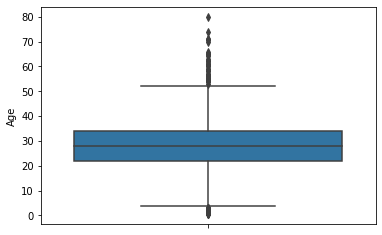

In [22]:
# Let's look at another column
sns.boxplot(y = 'Age',data = df)

In [23]:
q1_age  = np.percentile(df['Age'],25,interpolation='midpoint')
q2_age  = np.percentile(df['Age'],50,interpolation='midpoint')
q3_age  = np.percentile(df['Age'],75,interpolation='midpoint')

In [24]:
IQR_age = q3_age - q1_age

In [25]:
up_limit_age = q3_age + 1.5 *IQR_age
low_limit_age = q1_age - 1.5 *IQR_age


In [26]:
outliers_age = df.loc[(df['Age']>up_limit_age) | (df['Age']<low_limit_age)].index
outliers_age

Int64Index([  7,   8,  12,  16,  17,  34,  44,  55,  79,  95,  97, 117, 120,
            153, 165, 171, 173, 175, 184, 194, 206, 233, 250, 253, 262, 281,
            318, 327, 341, 349, 375, 382, 387, 408, 457, 468, 470, 480, 484,
            488, 493, 494, 514, 531, 546, 556, 571, 572, 583, 626, 627, 631,
            643, 645, 648, 673, 685, 695, 756, 773, 775, 789, 804, 825, 828,
            832, 852],
           dtype='int64', name='PassengerId')

In [27]:
df.drop(outliers_age,inplace=True)

<AxesSubplot:ylabel='Age'>

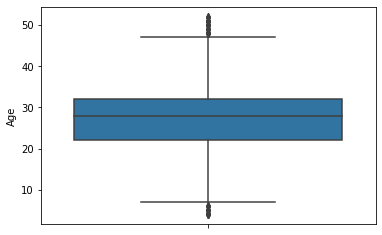

In [28]:
sns.boxplot(y = 'Age',data = df)

#### SibSp

<AxesSubplot:ylabel='SibSp'>

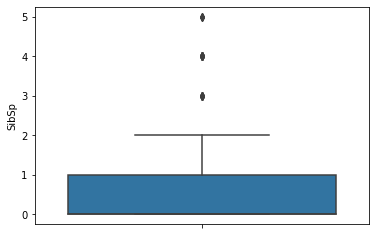

In [29]:
# Now let's look at SibSp column
sns.boxplot(y = 'SibSp',data = df)

From the above figure we can see that the number of outliers here is small so we can just filter out outliers easily

In [30]:
outliers_SS = df.SibSp>3.5
df.loc[outliers_SS].index

Int64Index([51, 60, 69, 72, 172, 183, 234, 267, 279, 481, 542, 543, 684, 687,
            788, 814, 851],
           dtype='int64', name='PassengerId')

In [31]:
df.drop([51, 60, 69, 72, 172, 183, 234, 267, 279, 481, 542, 543, 684, 687,
            788, 814, 851],inplace=True)

<AxesSubplot:ylabel='SibSp'>

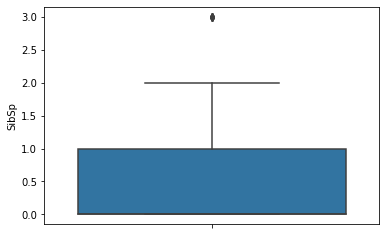

In [32]:
sns.boxplot(y = 'SibSp',data = df)

###  Do min max scaling on the feature set (Take ‘Survived’ as target)


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)

In [34]:
X = df.drop(columns=['Survived','Name','Ticket'])
X = pd.get_dummies(X)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,1,22.0,1,0,7.2500,0,0,1
3,3,0,26.0,0,0,7.9250,0,0,1
4,1,0,35.0,1,0,53.1000,0,0,1
5,3,1,35.0,0,0,8.0500,0,0,1
6,3,1,28.0,0,0,8.4583,0,1,0


In [35]:
from sklearn import preprocessing

In [36]:
min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)


In [37]:
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.753256,0.681621,0.510432,0.101785,0.046792,0.256970,0.149059,0.098408,0.752533
std,0.359509,0.466185,0.190693,0.196823,0.126506,0.203142,0.356405,0.298081,0.431853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.395833,0.000000,0.000000,0.120834,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.500000,0.000000,0.000000,0.161538,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.604167,0.333333,0.000000,0.370385,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
